In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def imshow(images):
    plt.figure(figsize = (10,10))
    plt.imshow(images)

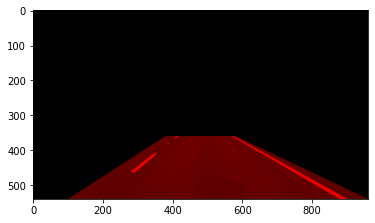

In [20]:
img = cv2.imread('test_images/solidWhiteCurve.jpg')
image = img.copy()
blur_img = cv2.GaussianBlur(img,(5,5),0)
gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)
height = gray_img.shape[0]
width = gray_img.shape[1]

roi_verices = [(100, height),(width/2-100, height/1.5),(width/2+100, height/1.5),(width, height)]
mask = np.zeros_like(image)
cv2.fillPoly(mask,np.array([roi_verices],np.int32),255)
cropped_mask = cv2.bitwise_and(mask,image)
plt.imshow(cropped_mask)

canny_img = cv2.Canny(cropped_mask,200,400)
#plt.imshow(canny_img)
#kernel  = np.ones((3,3))
#dilate_img = cv2.dilate(canny_img,kernel)

lines = cv2.HoughLinesP(canny_img,rho = 6,
                       theta = np.pi / 60,
                       threshold = 50,
                       lines = np.array([]),
                       minLineLength = 1,
                       maxLineGap = 25)
line_image = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),5)
img_copy = cv2.addWeighted(image, 0.8,line_image, 1, 0)
        
#imshow(img_copy)

#plt.imshow(dilate_img,cmap = 'gray')

In [6]:
video = cv2.VideoCapture('test_videos/solidYellowLeft.mp4')
while(video.isOpened()):
    #img = cv2.imread('test_images/solidWhiteCurve.jpg')
    _,frame = video.read()
    image = frame.copy()
    blur_img = cv2.GaussianBlur(image,(5,5),0)
    gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)
    height = gray_img.shape[0]
    width = gray_img.shape[1]

    roi_verices = [(170, height),(width/2-100, height/1.5),(width/2+100, height/1.5),(width - 60, height)]
    mask = np.zeros_like(gray_img)
    cv2.fillPoly(mask,np.array([roi_verices],np.int32),255)
    cropped_mask = cv2.bitwise_and(gray_img,mask)

    canny_img = cv2.Canny(cropped_mask,500,630)
#     kernel  = np.ones((3,3))
#     dilate_img = cv2.dilate(canny_img,kernel)

    lines = cv2.HoughLinesP(canny_img,rho = 6,
                           theta = np.pi / 60,
                           threshold = 50,
                           lines = np.array([]),
                           minLineLength = 1,
                           maxLineGap = 25)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image,(x1,y1),(x2,y2),(0,255,0),4)
    cv2.imshow('test',image)
    key = cv2.waitKey(10)
    if key == ord('q') or key == 27:
        break
video.release()
cv2.destroyAllWindows()

#plt.imshow(dilate_img,cmap = 'gray')